### Processing the housing data, version 2 (WITH seaborn)

In [255]:
# if needed:
# pip install seaborn

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [256]:
df = pd.read_csv("houses.csv")

In [257]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


**Step 1, remove obvious unnecessary columns**

In [258]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='str')

In [259]:
# removables: id, lat, long, zipcode

# zipcode, lat, lng all contain information about the location of the house
# which would be a valuable information
# however, these variables would need more processing in order to categorize
# city centre, suburbs etc. 

# in current form, they behave like any measurement for ML models, thus confusing
# them (e.g. we can't imply a bigger zipcode equals to bigger house prioce)

# date is potentially a removable, but needs more inspection
# also there are many variables regarding the area of the house
# usually in ML algorithms, we don't have too many variables
# that do the exact same thing (or almost the same thing)

# for now, version 1: let's remove: id, zipcode, lat, long
df = df.drop(['id', 'lat', 'long', 'zipcode'], axis=1)

In [260]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='str')

In [261]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287


**Step 1.5 - date-column is potentially something we can drop, let's inspect further**

In [262]:
# convert to datetime -> so we can take out the years and months
df['date'] = pd.to_datetime(df['date'])

In [263]:
# since date is now a DateTime-object, we can extract details from it
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [264]:
# we extracted year and month, remove original date
df = df.drop("date", axis=1)

In [265]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509,2014,5
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200,2015,2
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007,2014,6
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287,2015,1


In [266]:
df['year'].value_counts()

year
2014    14633
2015     6980
Name: count, dtype: int64

In [267]:
df.corr(numeric_only=True)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,year,month
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.585379,0.082447,0.003576,-0.010081
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,0.391638,0.029244,-0.009838,-0.001533
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.568634,0.087175,-0.026596,0.007392
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.756420,0.183286,-0.029038,0.011810
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,0.144608,0.718557,0.005468,-0.002369
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.279885,-0.011269,-0.022315,0.014005
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.086463,0.030703,-0.004165,0.008132
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.280439,0.072575,0.001364,-0.005638
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.092824,-0.003406,-0.045589,0.021978
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,0.713202,0.119248,-0.030387,0.008376


**It seems year/month has approximately no correlation to price. We can discard at this point.**

However, it would be a good idea to check ASSOCIATIONS with phik-matrix to see if there's a non-linear connection with year/month against price.

In [268]:
# drop the year/month for now
df = df.drop(["year", "month"], axis=1)

### EXTRA: use seaborn for correlation matrix

<Axes: >

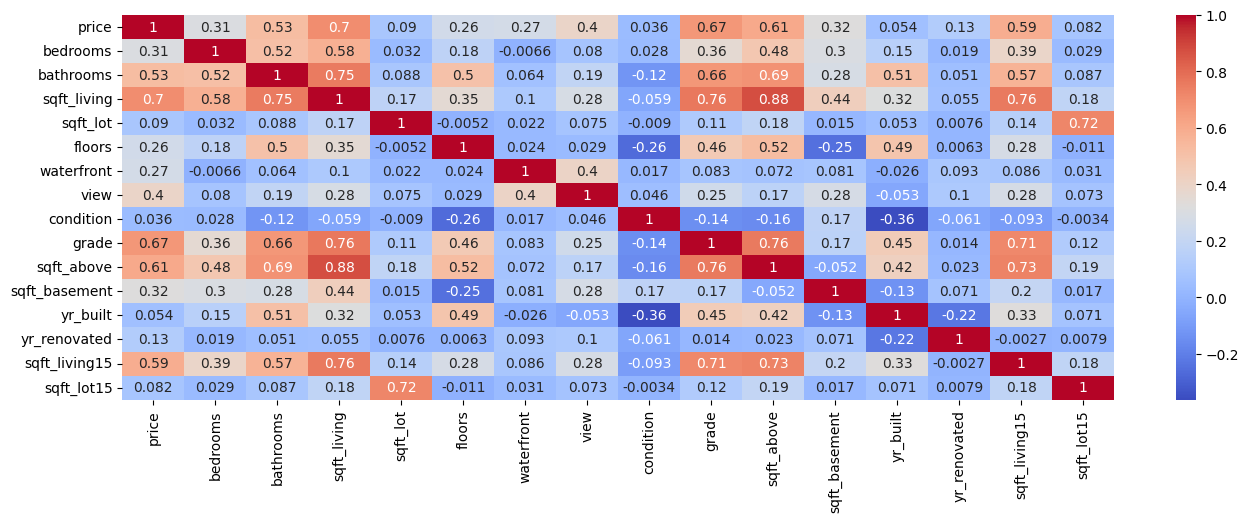

In [269]:
# get correlations on numeric data and use seaborn heatmap
# this particular dataset has a bit too many variables for
# visualizing the correlation matrix with a heatmap though...
correlations = df.corr(numeric_only=True)
plt.figure(figsize=(16,5))
sns.heatmap(correlations, annot=True, cmap="coolwarm")

**Step 2: Data conversions**

In [270]:
# we need to find out => how to convert square footage into square meters
df['living_m2'] = df['sqft_living'] * 0.09290304
df['basement_m2'] = df['sqft_basement'] * 0.09290304
df['lot_m2'] = df['sqft_lot'] * 0.09290304
df['above_m2'] = df['sqft_above'] * 0.09290304
df['living_m2_area'] = df['sqft_living15'] * 0.09290304
df['lot_m2_area'] = df['sqft_lot15'] * 0.09290304

# finally drop the originals
df = df.drop(['sqft_lot', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15'], axis=1)

In [271]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'yr_built', 'yr_renovated', 'living_m2',
       'basement_m2', 'lot_m2', 'above_m2', 'living_m2_area', 'lot_m2_area'],
      dtype='str')

In [272]:
df

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,living_m2,basement_m2,lot_m2,above_m2,living_m2_area,lot_m2_area
0,221900.0,3,1.00,1.0,0,0,3,7,1955,0,109.625587,0.000000,524.902176,109.625587,124.490074,524.902176
1,538000.0,3,2.25,2.0,0,0,3,7,1951,1991,238.760813,37.161216,672.803816,201.599597,157.006138,709.686323
2,180000.0,2,1.00,1.0,0,0,3,6,1933,0,71.535341,0.000000,929.030400,71.535341,252.696269,748.984308
3,604000.0,4,3.00,1.0,0,0,5,7,1965,0,182.089958,84.541766,464.515200,97.548192,126.348134,464.515200
4,510000.0,3,2.00,1.0,0,0,3,8,1987,0,156.077107,0.000000,750.656563,156.077107,167.225472,697.051509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,3.0,0,0,3,8,2009,0,142.141651,0.000000,105.073338,142.141651,142.141651,140.190687
21609,400000.0,4,2.50,2.0,0,0,3,8,2014,0,214.606022,0.000000,540.045372,214.606022,170.012563,668.901888
21610,402101.0,2,0.75,2.0,0,0,3,7,2009,0,94.761101,0.000000,125.419104,94.761101,94.761101,186.456401
21611,400000.0,3,2.50,2.0,0,0,3,8,2004,0,148.644864,0.000000,221.852460,148.644864,130.993286,119.566212


In [273]:
# yr_renovated looks weird, lots of zeroes
# probably means either => no data available or -> house has been never renovated
df['yr_renovated'].value_counts()

yr_renovated
0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1948        1
1951        1
1959        1
1934        1
1944        1
Name: count, Length: 70, dtype: int64

In [274]:
# we can attempt fixing yr_renovated with this logic:
# if there is a real renovation year => keep it as it is
# if renovation year is 0 => use yr_built as the renovation year

# basically measures when was the last time any building effort was done
# but then again, most likely 0 means data is missing in more than 95% of the cases
# => probably just better just to remove this variable (because it's noise)
df = df.drop(['yr_renovated'], axis=1)

In [275]:
df

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,living_m2,basement_m2,lot_m2,above_m2,living_m2_area,lot_m2_area
0,221900.0,3,1.00,1.0,0,0,3,7,1955,109.625587,0.000000,524.902176,109.625587,124.490074,524.902176
1,538000.0,3,2.25,2.0,0,0,3,7,1951,238.760813,37.161216,672.803816,201.599597,157.006138,709.686323
2,180000.0,2,1.00,1.0,0,0,3,6,1933,71.535341,0.000000,929.030400,71.535341,252.696269,748.984308
3,604000.0,4,3.00,1.0,0,0,5,7,1965,182.089958,84.541766,464.515200,97.548192,126.348134,464.515200
4,510000.0,3,2.00,1.0,0,0,3,8,1987,156.077107,0.000000,750.656563,156.077107,167.225472,697.051509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,3.0,0,0,3,8,2009,142.141651,0.000000,105.073338,142.141651,142.141651,140.190687
21609,400000.0,4,2.50,2.0,0,0,3,8,2014,214.606022,0.000000,540.045372,214.606022,170.012563,668.901888
21610,402101.0,2,0.75,2.0,0,0,3,7,2009,94.761101,0.000000,125.419104,94.761101,94.761101,186.456401
21611,400000.0,3,2.50,2.0,0,0,3,8,2004,148.644864,0.000000,221.852460,148.644864,130.993286,119.566212


In [276]:
df['waterfront'].value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

In [277]:
df['view'].value_counts()

view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64

### To reduce the amount of variables and make it easier to visualize, drop more columns

In [278]:
# because we have so many variables, we'll remove some of the similar variables
# regarding the areas of the house etc.
df = df.drop(["basement_m2", "lot_m2", "above_m2", "living_m2_area", "lot_m2_area"], axis=1)

# due to high imbalance in waterfront and view, it's possible these variables
# don't affect the result that much (correlations, plots)
# HOWEVER, always double-check with other plots
# for balance and whether there is any significant connection
# by default (by using common sense), only a few houses can be next to water 
# or along a river (because not enough space)

# also dropping condition, since it affects technically nothing
df = df.drop(["view", "waterfront", "condition"], axis=1)

<Axes: >

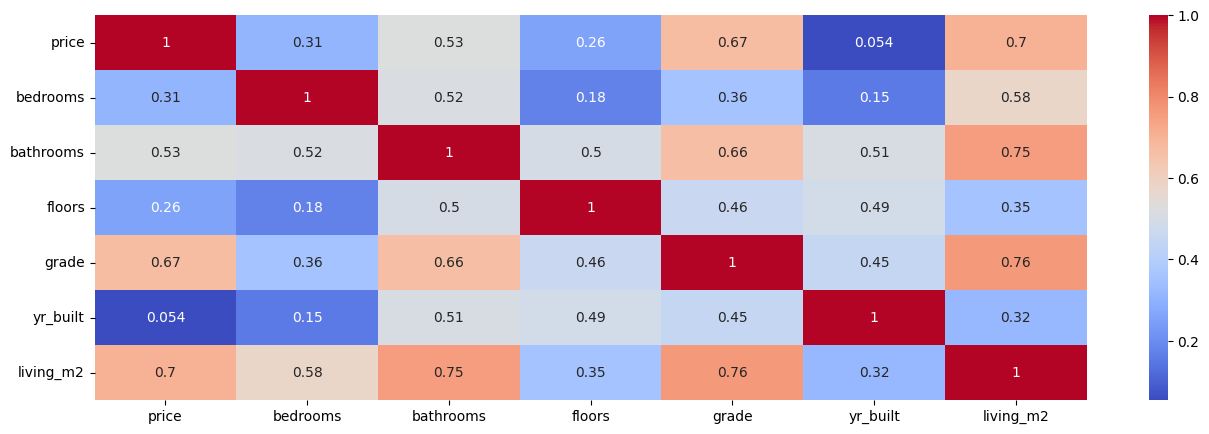

In [279]:
# finally, let's see correlations
correlations = df.corr(numeric_only=True)
plt.figure(figsize=(16,5))
sns.heatmap(correlations, annot=True, cmap="coolwarm")

# since not too many variables anymore, we 
# can also just show the plain correlation-matrix
# and it's still quite readable
# correlations

### Continue from here, WHAT ELSE can we find from the housing data (let's start using seaborn)

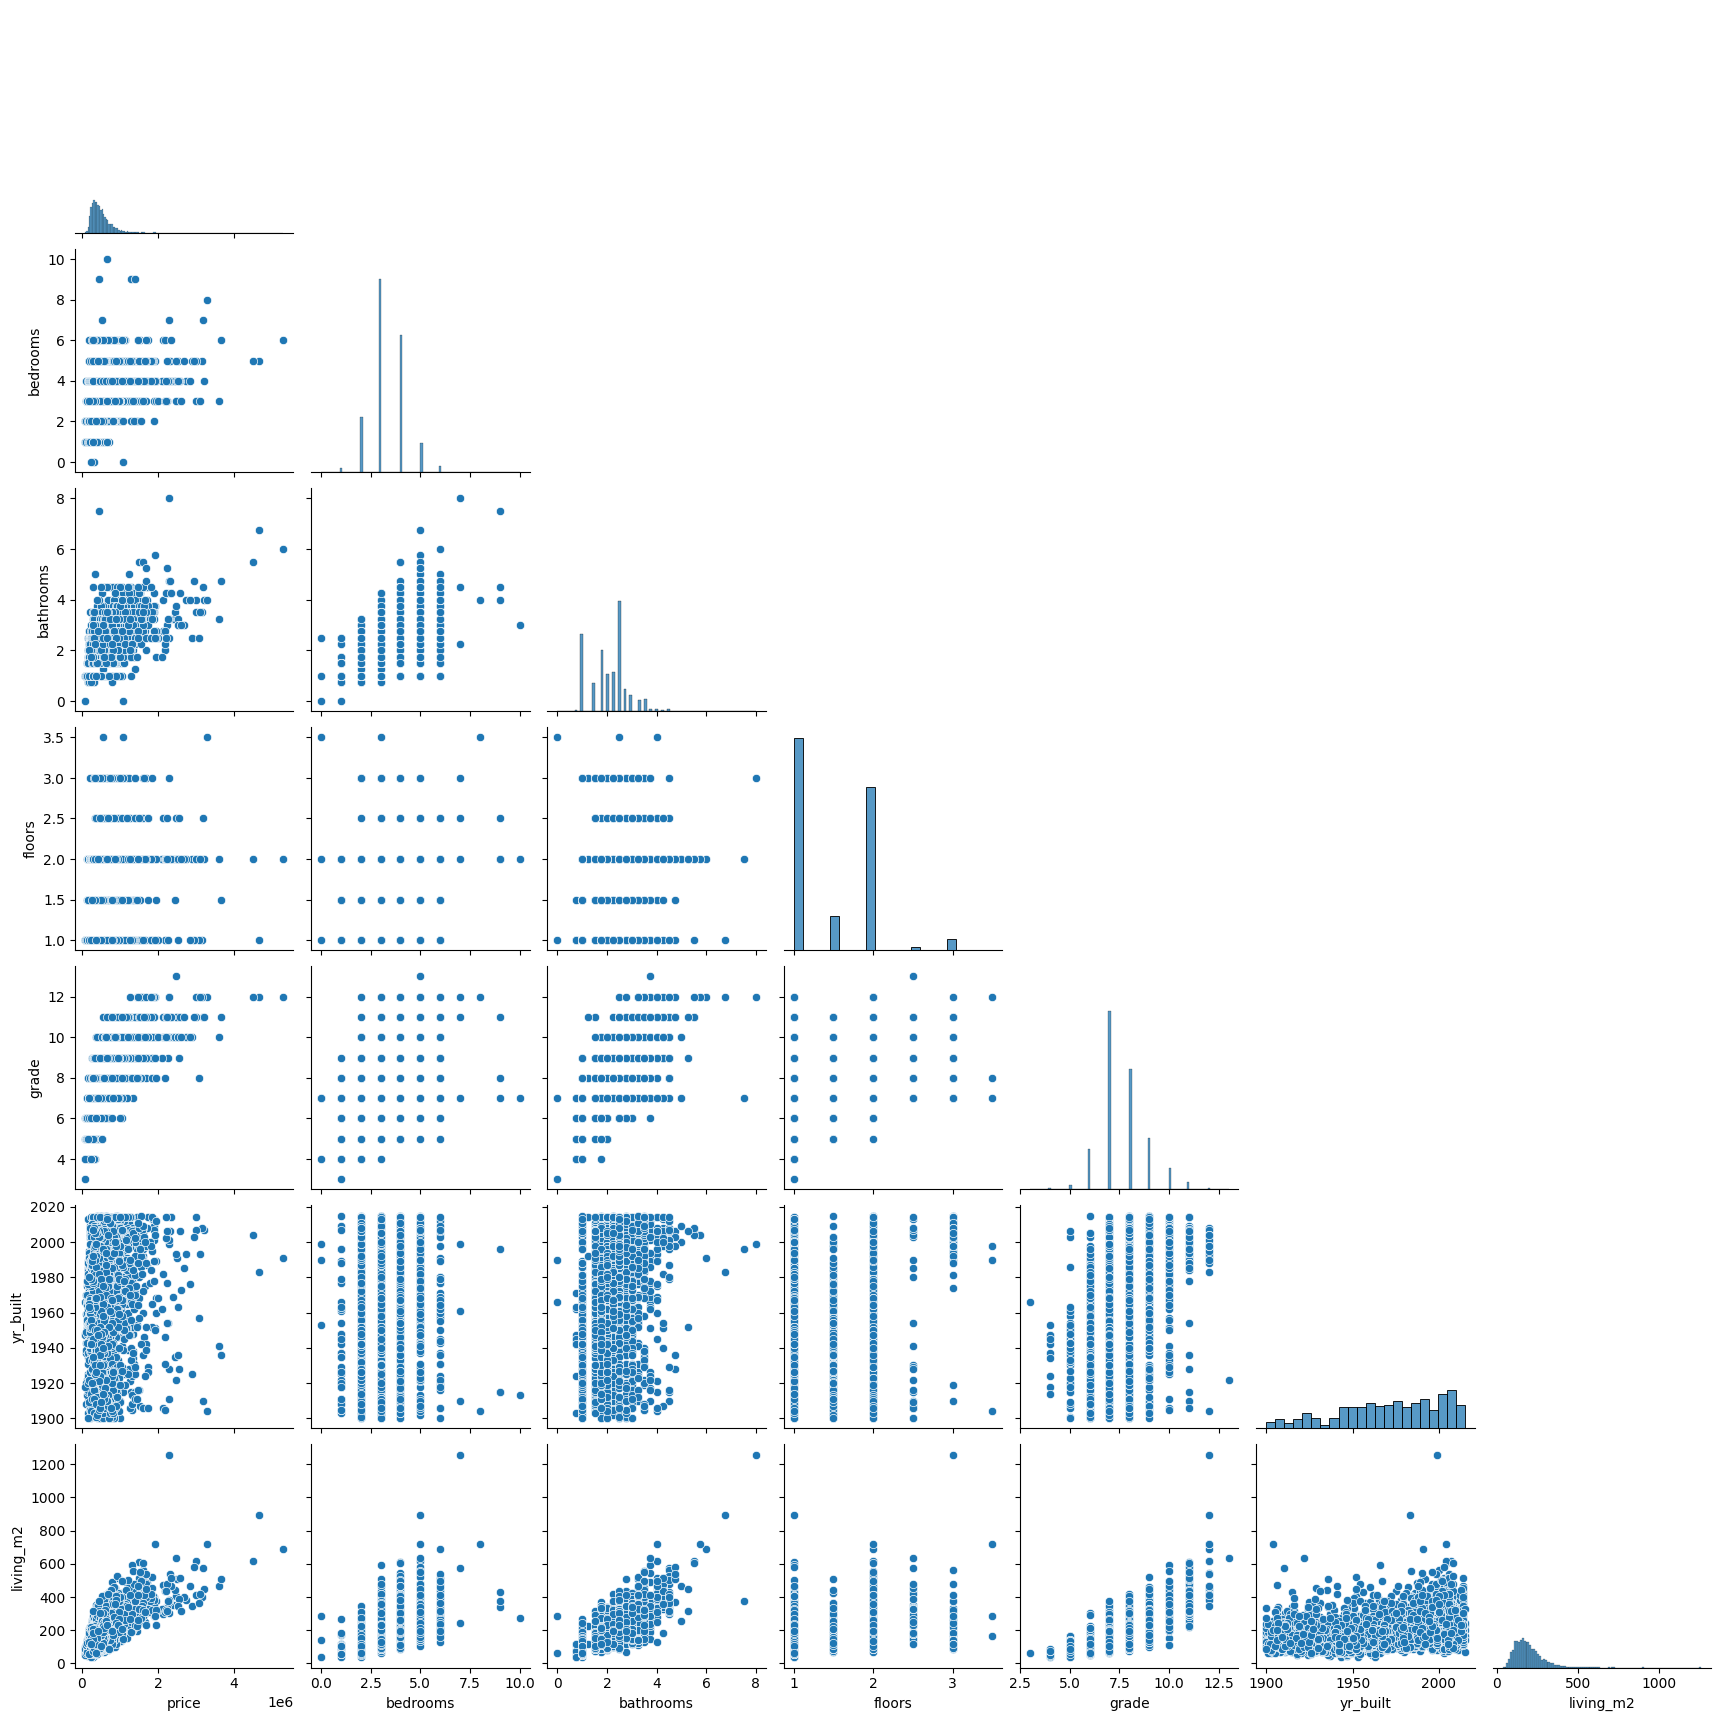

In [280]:
# to make plots easier to understand, you might want to take a smaller
# sample from the DataFrame for analysis purposes
df_sample = df.sample(5000)

sns.pairplot(df_sample, corner=True)

In [281]:
# it seems we have some trends in all of the variables regarding price
# but yr_built is chaotic

# IDEA! let's simplify the yr_built into age-categories (reduce cardinality)
def create_age_group(row):
    year = row['yr_built']

    if year >= 2005:
        return 4
    elif 1985 <= year < 2005:
        return 3
    elif 1960 <= year < 1985:
        return 2
    else:
        return 1
    
# apply the function above
df['age_group'] = df.apply(create_age_group, axis=1)

In [282]:
# after creating the age group => drop the original yr_built
df = df.drop("yr_built", axis=1)

In [283]:
df['age_group'].value_counts()

age_group
1    7389
2    5930
3    5135
4    3159
Name: count, dtype: int64

### Small trick to remove some extreme outliers! (SciPy)

This is a good idea in order to remove extreme cases from the data (like huge mansions with 13 bedrooms or small buildings without a bathroom)...

In [284]:
from scipy import stats

# remove outliers, everything has to be numeric before using this 
# always remember, this is a quick and dirty way to remove extreme outliers
# however, it's also very straight-forward, and you don't have control what is removed
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [285]:
df

,price,bedrooms,bathrooms,floors,grade,living_m2,age_group
0,221900.0,3,1.00,1.0,7,109.625587,1
1,538000.0,3,2.25,2.0,7,238.760813,1
2,180000.0,2,1.00,1.0,6,71.535341,1
3,604000.0,4,3.00,1.0,7,182.089958,2
4,510000.0,3,2.00,1.0,8,156.077107,3
...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,3.0,8,142.141651,4
21609,400000.0,4,2.50,2.0,8,214.606022,4
21610,402101.0,2,0.75,2.0,7,94.761101,4
21611,400000.0,3,2.50,2.0,8,148.644864,3


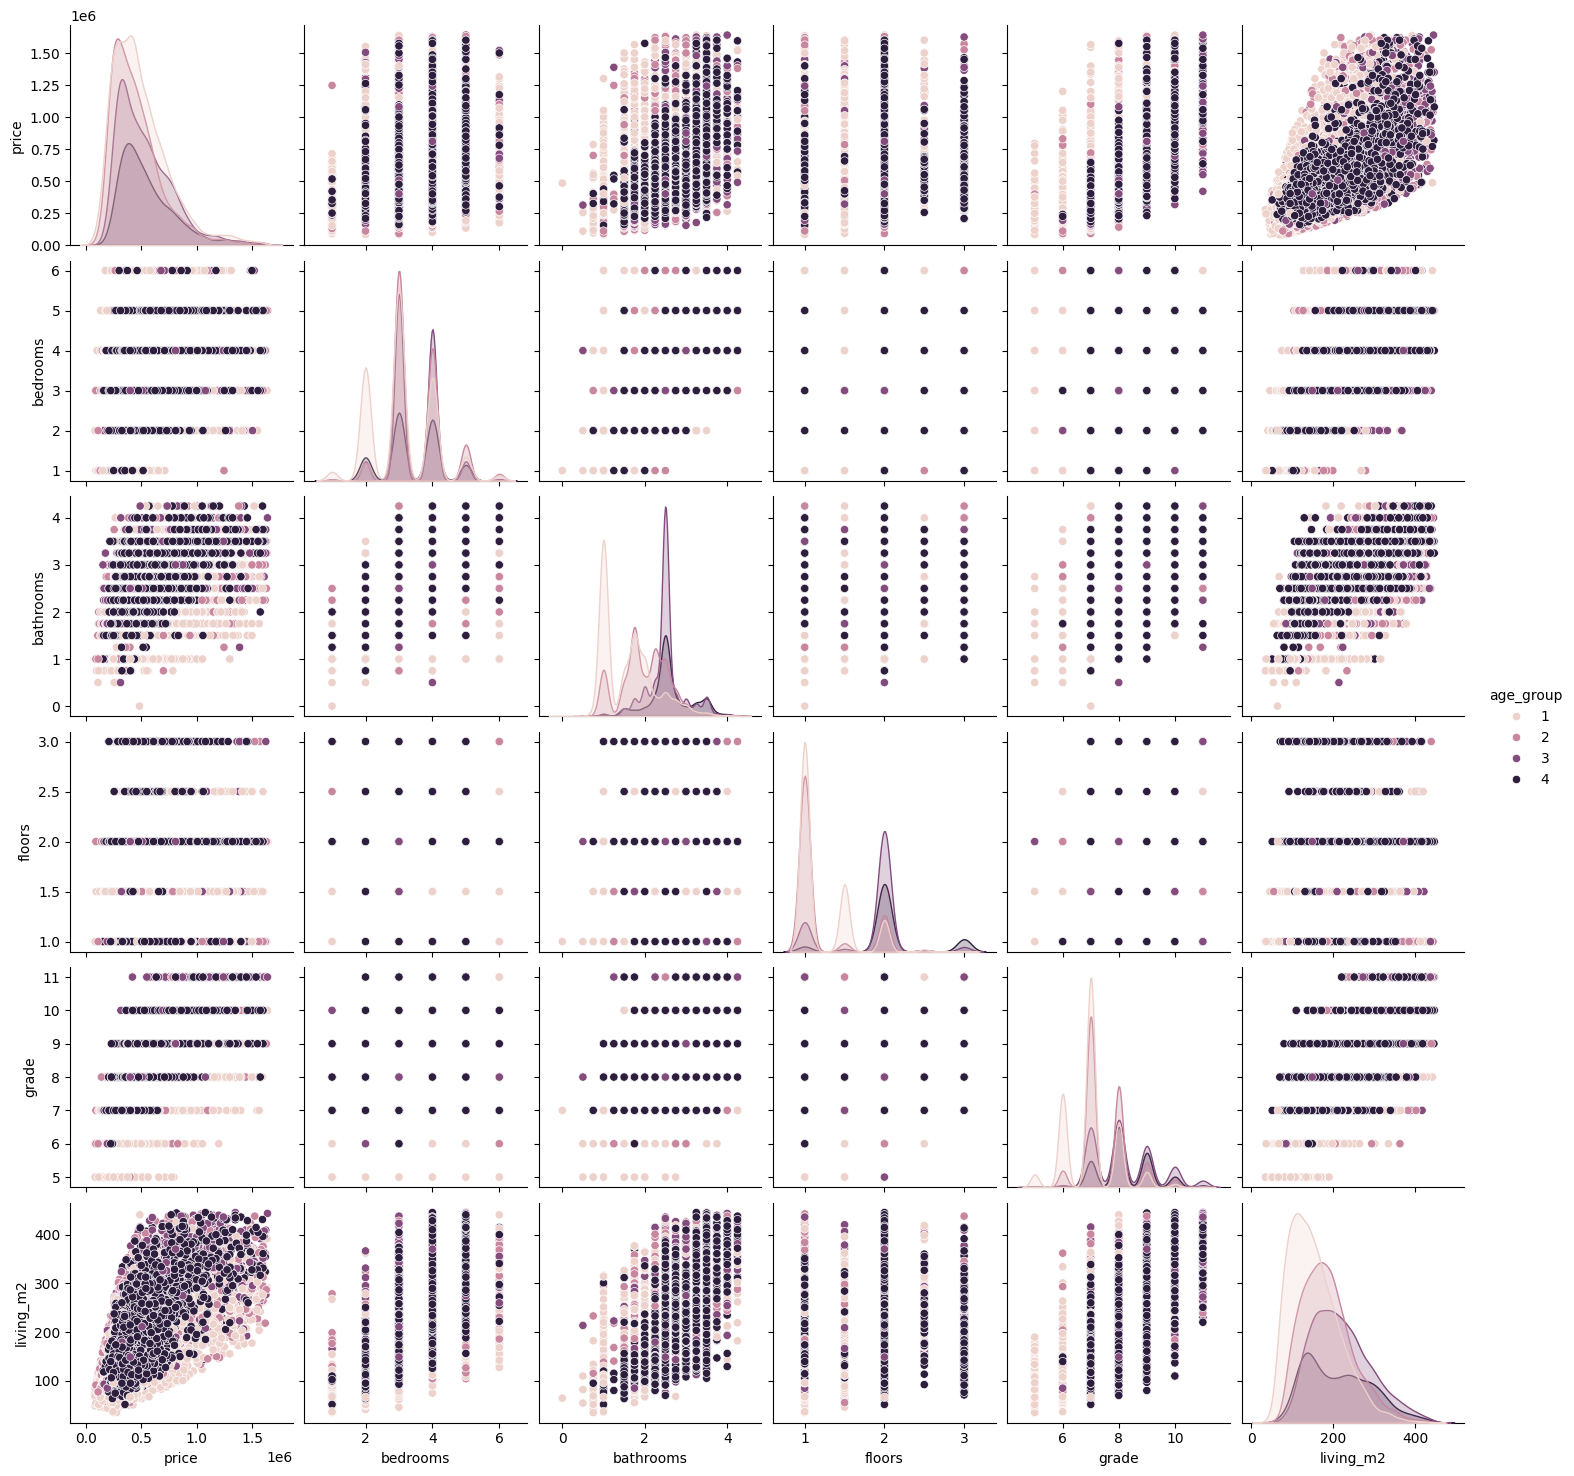

In [286]:
sns.pairplot(df, hue="age_group")

In [287]:
# it seems the newer houses in this dataset are bigger than the older ones
# ... which wouldn't make any sense in Finnish context, but this data is from US, Seattle

<Axes: xlabel='price', ylabel='Count'>

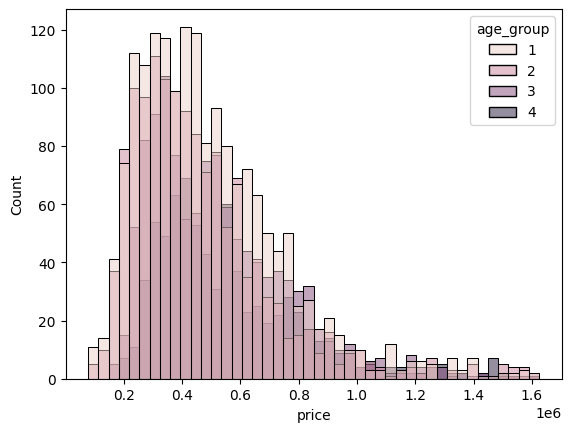

In [290]:
# histogram gets a bit too crowded with full data
# => let's use a smaller sample 
df_sample = df.sample(5000)

# let's study house age vs price
sns.histplot(x="price", hue="age_group", data=df_sample)

# can't see much here, the age does not probably DIRECTLY affect the price
# BUT age group seems to affect secondary variables like living_m2!
# e.g. => age affects house size => house size affects price

<Axes: xlabel='living_m2', ylabel='price'>

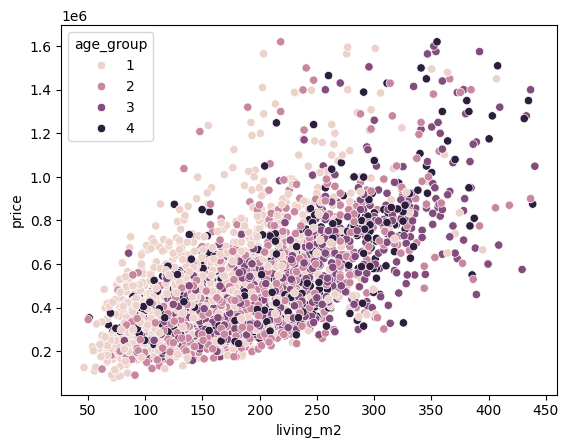

In [289]:
# let's also have a specific plot for living space vs price vs age group
sns.scatterplot(x="living_m2", y="price", hue="age_group", data=df_sample)

In [ ]:
# based on the scatter plot above: even though the age group doesn't directly affect the price
# the age group affects the typical living area in the house, and living area affects directly the price

# this implies => newer houses seem to be bigger and older ones smaller
# would be a good idea to study/research/ask AI etc. if this is expected in US Seattle

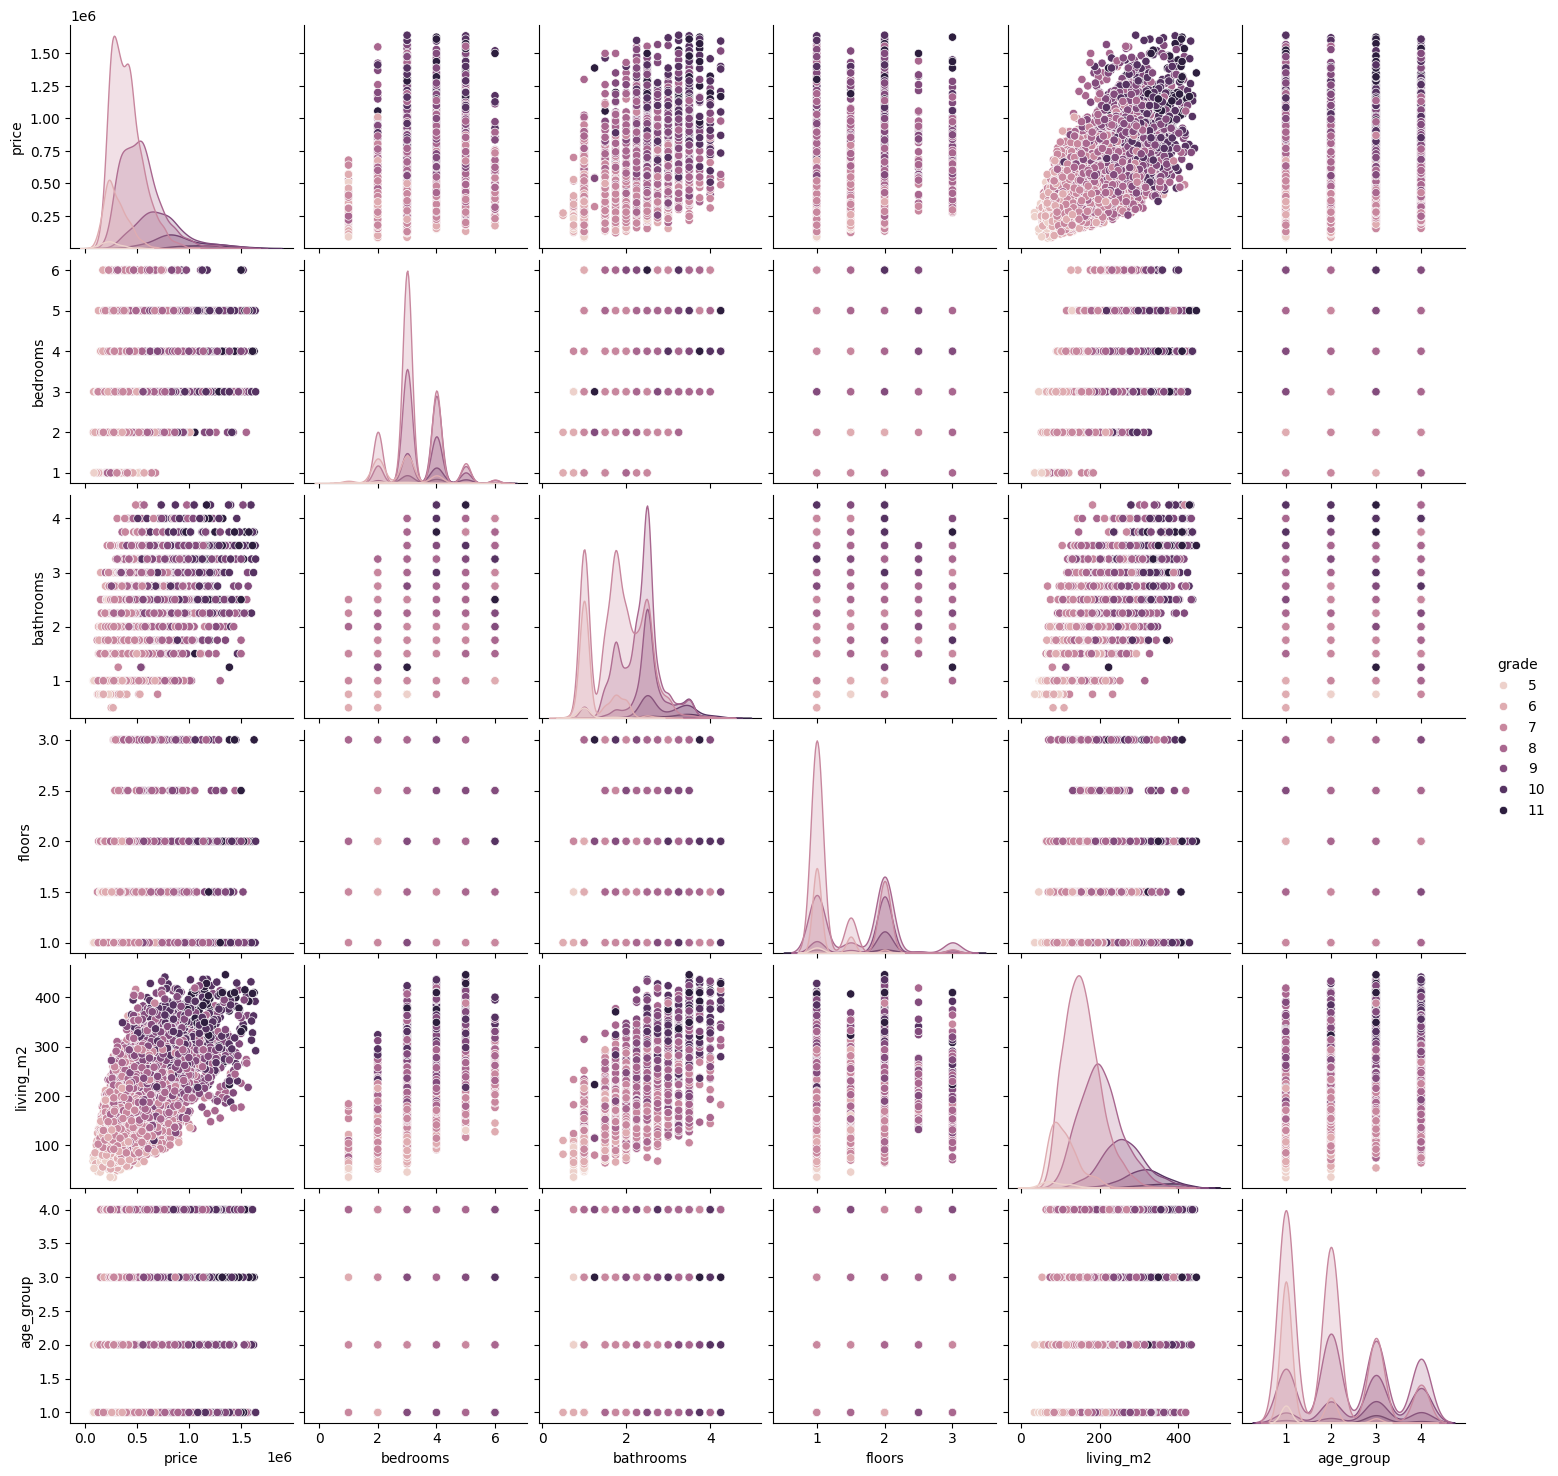

In [291]:
df_sample = df.sample(8000)
sns.pairplot(df_sample, hue="grade")

<Axes: xlabel='living_m2', ylabel='price'>

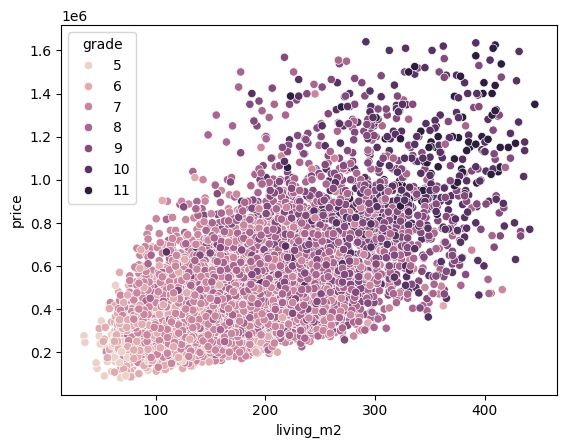

In [292]:
sns.scatterplot(x="living_m2", y="price", hue="grade", data=df_sample)

<Axes: >

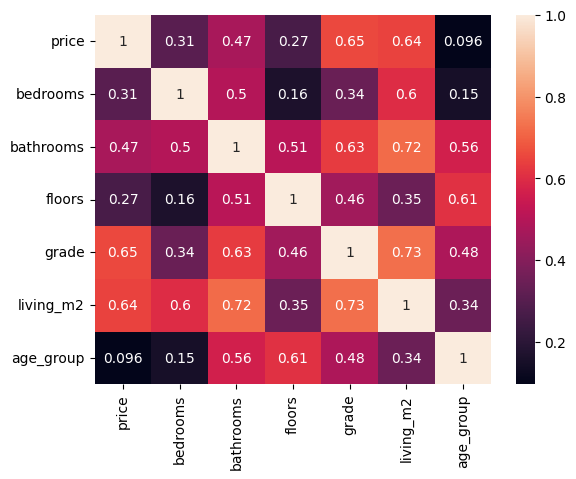

In [295]:
correlations = df.corr(numeric_only=True)
sns.heatmap(correlations, annot=True)

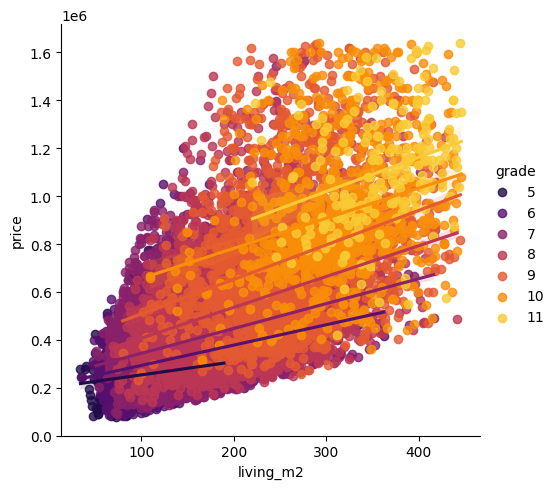

In [301]:
sns.lmplot(x="living_m2", y="price", hue="grade", data=df, palette="inferno")

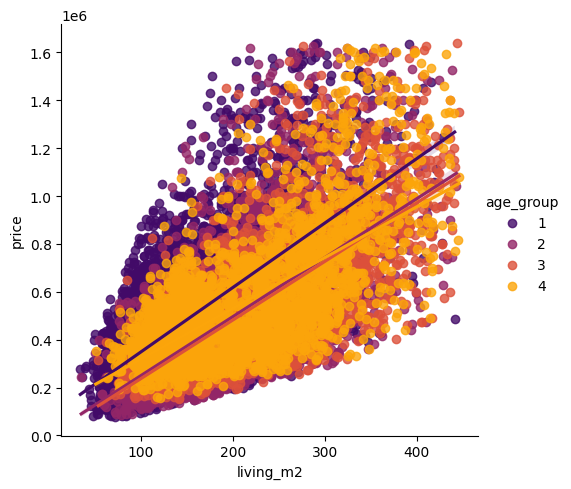

In [302]:
sns.lmplot(x="living_m2", y="price", hue="age_group", data=df, palette="inferno")

### box plots, let's inspect the bedrooms and bathrooms

C:\Users\tuomas.valtanen\AppData\Local\Temp\ipykernel_3648\3570854561.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="bathrooms", y="price", data=df_sample, palette="magma")


<Axes: xlabel='bathrooms', ylabel='price'>

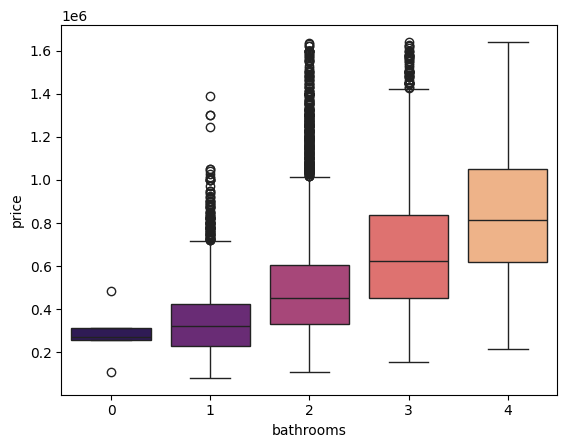

In [307]:
# the US bathroom size system is based on decimals
# all fixtures are only 0.25
# for example a bathroom with shower, sink, toilet => 0.75 bathrooms

# here we are going to OVER-SIMPLIFY by just turning this column into integer
# if we would use the original decimals => the box plots get very hard to read

df_sample = df.sample(20000)
df_sample['bathrooms'] = df_sample['bathrooms'].round(0).astype(int)

sns.boxplot(x="bathrooms", y="price", data=df_sample, palette="magma")

<Axes: xlabel='bathrooms', ylabel='price'>

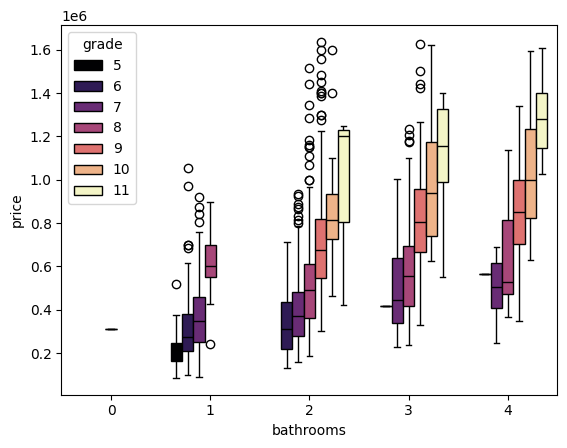

In [308]:
df_sample = df.sample(2000)
df_sample['bathrooms'] = df_sample['bathrooms'].round(0).astype(int)

sns.boxplot(x="bathrooms", y="price", data=df_sample, hue="grade", palette="magma")

C:\Users\tuomas.valtanen\AppData\Local\Temp\ipykernel_3648\2747607628.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="bedrooms", y="price", data=df_sample, palette="magma")


<Axes: xlabel='bedrooms', ylabel='price'>

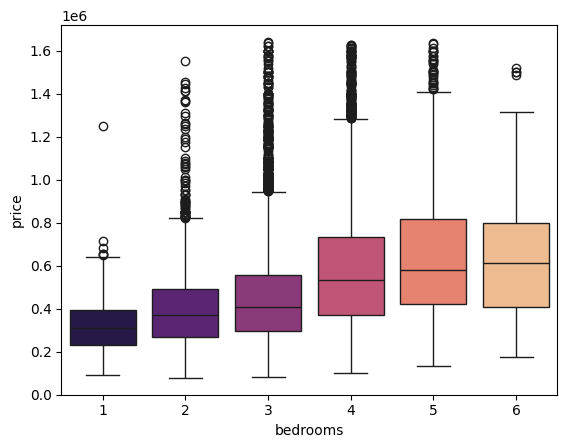

In [309]:
df_sample = df.sample(20000)
df_sample['bedrooms'] = df_sample['bedrooms'].round(0).astype(int)

sns.boxplot(x="bedrooms", y="price", data=df_sample, palette="magma")

C:\Users\tuomas.valtanen\AppData\Local\Temp\ipykernel_3648\960965302.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="floors", y="price", data=df_sample, palette="magma")


<Axes: xlabel='floors', ylabel='price'>

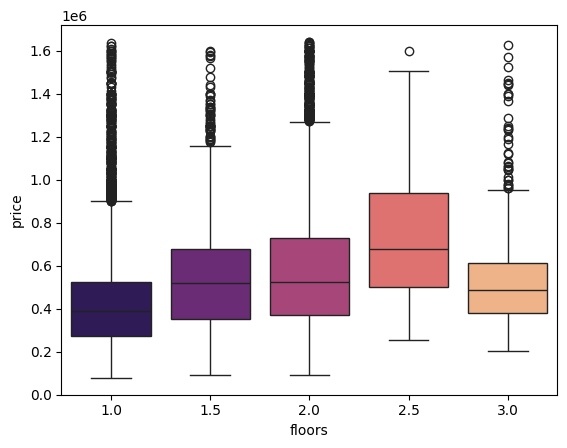

In [311]:
df_sample = df.sample(20000)
#df_sample['floors'] = df_sample['floors'].round(0).astype(int)

sns.boxplot(x="floors", y="price", data=df_sample, palette="magma")

In [312]:
df['floors'].value_counts()

floors
1.0    10542
2.0     7765
1.5     1875
3.0      588
2.5      129
Name: count, dtype: int64

In [313]:
df['bedrooms'].value_counts()

bedrooms
3    9739
4    6592
2    2740
5    1431
6     213
1     184
Name: count, dtype: int64

### Some conclusions from this dataset...

In [ ]:
# price is defined MOSTLY by => grade and almost as heavily by living square meters
# age group doesn't affect the price directly, but it does affect the other variables somewhat
# => especially the living square meters (newer houses are bigger than older ones)
# bathrooms seem to increase the price (more bathrooms => bigger price, usually)
# bedrooms have a weaker connection, but seem to affect price a little bit as well
# but not as much as the bathrooms (as far as we know, bathrooms are more important in the US house market
# than for example in the Finnish house market)